# Описание
Данные имеют следующую структуру:

* записываются для каждого пользователя, совершившего покупки, каждый день
* для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
* внутри каждой папки есть файл data.csv, где и хранятся данные

Например, 30 декабря три покупателя сделали покупки, 31 – два 
(папки 2020-12-30 и 2020-12-31 соответственно). Поскольку клиент FirstName_LastName1 купил товары в оба дня, для него имеется папка в папке для каждой из дат. Для других клиентов – по одной.

Note: данные в задании покрывают другой временной период, имена тоже другие. Подробности, примеры и возможные подсказки можно найти в текстах следующих шагов.

      

# Задачи
1. Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)
2. Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.
3. Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?
4. Визуализируйте продажи по дням.
5. Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [171]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
os.listdir('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d.gordeev-13/shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Alexey_Fedorov')

['data.csv']

In [11]:
pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d.gordeev-13/shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Alexey_Fedorov/data.csv')

,Unnamed: 0,product_id,quantity
0,0,73,5
1,1,34,1
2,2,71,1
3,3,18,2
4,4,67,2


In [26]:
os.walk(path)

<generator object walk at 0x7f2b2c4dcb10>

In [85]:
for dd in os.walk(path):
    d = dd[0]
    print('d is',d)

d is /mnt/HC_Volume_18315164/home-jupyter/jupyter-d.gordeev-13/shared/homeworks/python_ds_miniprojects/4/data
d is /mnt/HC_Volume_18315164/home-jupyter/jupyter-d.gordeev-13/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05
d is /mnt/HC_Volume_18315164/home-jupyter/jupyter-d.gordeev-13/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov
d is /mnt/HC_Volume_18315164/home-jupyter/jupyter-d.gordeev-13/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Smirnov
d is /mnt/HC_Volume_18315164/home-jupyter/jupyter-d.gordeev-13/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Rostislav_Smirnov
d is /mnt/HC_Volume_18315164/home-jupyter/jupyter-d.gordeev-13/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Kirill_Smirnov
d is /mnt/HC_Volume_18315164/home-jupyter/jupyter-d.gordeev-13/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Fedorov
d is /mnt/HC_Volume_18315164/home-jupyter/jupyter-d.gordeev-13/shared/homeworks/python_ds_m

In [82]:
path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-d.gordeev-13/shared/homeworks/python_ds_miniprojects/4/data'

In [147]:
path_parts = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-d.gordeev-13/shared/hom,s..eworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Smirnov'.split('/')
name=path_parts[-1]
date=path_parts[-2]

In [148]:
#create df for of data 
df = pd.DataFrame()
#read data from file
for triple in os.walk(path):
    current_path = triple[0]
    dirs = triple[1]
    file = triple[2]
    for file in file:
        #полный путь к файлу
        #print('current_path is',current_path)
        data_path = (f'{current_path}/{file}')
        #считываем файл
        temp_df = pd.read_csv(data_path)
        #name date
        path_parts = current_path.split('/')
        name=path_parts[-1]
        date=path_parts[-2]
        temp_df['date'] = date
        temp_df['name'] = name
        #объединем дф
        df = pd.concat((df, temp_df))


In [149]:
df

,Unnamed: 0,product_id,quantity,date,name
0,0,27,4,2020-12-05,Petr_Ivanov
1,1,89,1,2020-12-05,Petr_Ivanov
2,2,33,2,2020-12-05,Petr_Ivanov
3,3,8,3,2020-12-05,Petr_Ivanov
4,4,16,1,2020-12-05,Petr_Ivanov
...,...,...,...,...,...
0,0,18,4,2020-12-07,Petr_Fedorov
1,1,94,4,2020-12-07,Petr_Fedorov
0,0,95,2,2020-12-07,Vasiliy_Ivanov
1,1,83,3,2020-12-07,Vasiliy_Ivanov


In [150]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [151]:
df.reset_index(drop = True, inplace = True)

In [152]:
df.quantity.sum()

480

In [134]:
from pathlib import Path

In [135]:
path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-d.gordeev-13/shared/homeworks/python_ds_miniprojects/4/data'

In [136]:
path =Path('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d.gordeev-13/shared/homeworks/python_ds_miniprojects/4/data')

In [137]:
path

PosixPath('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d.gordeev-13/shared/homeworks/python_ds_miniprojects/4/data')

In [145]:
#create df for of data 
df = pd.DataFrame()
#read data from file
for triple in os.walk(path):
    current_path = triple[0]
    dirs = triple[1]
    file = triple[2]
    for file in file:
        x = Path(current_path) / file
        #считываем файл
        temp_df = pd.read_csv(x)
        #name date
        #x = current_path.split('/')
        name=x.parts[-2]
        date=x.parts[-3]
        temp_df['date'] = date
        temp_df['name'] = name
        #объединем дф
        df = pd.concat((df, temp_df))

In [144]:
x.parts[-1]

'data.csv'

In [146]:
df

,Unnamed: 0,product_id,quantity,date,name
0,0,27,4,2020-12-05,Petr_Ivanov
1,1,89,1,2020-12-05,Petr_Ivanov
2,2,33,2,2020-12-05,Petr_Ivanov
3,3,8,3,2020-12-05,Petr_Ivanov
4,4,16,1,2020-12-05,Petr_Ivanov
...,...,...,...,...,...
0,0,18,4,2020-12-07,Petr_Fedorov
1,1,94,4,2020-12-07,Petr_Fedorov
0,0,95,2,2020-12-07,Vasiliy_Ivanov
1,1,83,3,2020-12-07,Vasiliy_Ivanov


In [153]:
df

,product_id,quantity,date,name
0,27,4,2020-12-05,Petr_Ivanov
1,89,1,2020-12-05,Petr_Ivanov
2,33,2,2020-12-05,Petr_Ivanov
3,8,3,2020-12-05,Petr_Ivanov
4,16,1,2020-12-05,Petr_Ivanov
...,...,...,...,...
156,18,4,2020-12-07,Petr_Fedorov
157,94,4,2020-12-07,Petr_Fedorov
158,95,2,2020-12-07,Vasiliy_Ivanov
159,83,3,2020-12-07,Vasiliy_Ivanov


In [162]:
df.groupby('name', as_index = False) \
  .agg({'quantity':'sum'}) \
  .sort_values('quantity' , ascending = False) \


,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


In [178]:
df1 = df.groupby('product_id', as_index = False) \
  .agg({'quantity':'sum'}) \
  .sort_values('quantity' , ascending = False) \
  .head(10)

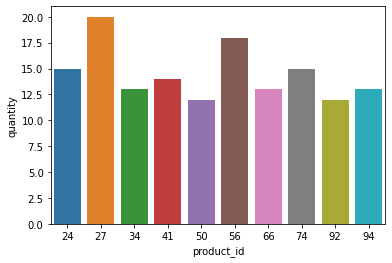

In [179]:
sns.barplot(data = df1, x='product_id', y='quantity')


In [180]:
df

,product_id,quantity,date,name
0,27,4,2020-12-05,Petr_Ivanov
1,89,1,2020-12-05,Petr_Ivanov
2,33,2,2020-12-05,Petr_Ivanov
3,8,3,2020-12-05,Petr_Ivanov
4,16,1,2020-12-05,Petr_Ivanov
...,...,...,...,...
156,18,4,2020-12-07,Petr_Fedorov
157,94,4,2020-12-07,Petr_Fedorov
158,95,2,2020-12-07,Vasiliy_Ivanov
159,83,3,2020-12-07,Vasiliy_Ivanov


In [189]:
sell = df.groupby('date', as_index = False) \
  .agg({'quantity':'sum'}) \
  .sort_values('date') 

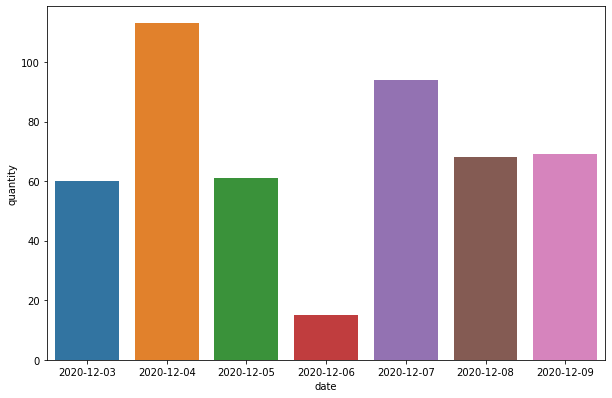

In [190]:
plt.figure(figsize=(10, 6.5))
sns.barplot(data = sell, x='date', y='quantity')



In [208]:
df

,product_id,quantity,date,name
0,27,4,2020-12-05,Petr_Ivanov
1,89,1,2020-12-05,Petr_Ivanov
2,33,2,2020-12-05,Petr_Ivanov
3,8,3,2020-12-05,Petr_Ivanov
4,16,1,2020-12-05,Petr_Ivanov
...,...,...,...,...
156,18,4,2020-12-07,Petr_Fedorov
157,94,4,2020-12-07,Petr_Fedorov
158,95,2,2020-12-07,Vasiliy_Ivanov
159,83,3,2020-12-07,Vasiliy_Ivanov


In [212]:
df.groupby(['name' , 'product_id']) \
  .agg({'date':pd.Series.nunique}) \
 

date
name           product_id      
Alexey_Fedorov 13             1
               15             1
               18             1
               34             1
               50             1
...                         ...
Vasiliy_Ivanov 83             1
               94             1
               95             1
Vasiliy_Petrov 27             1
               78             1

[158 rows x 1 columns]